In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
#sys.path.append('/home/traver/pymodules/')
#import hartware as hw

In [3]:
import scipy.stats as stats
import seaborn as sns

In [4]:
rcParams['pdf.fonttype']=42
rcParams['font.family']='sans-serif'
rcParams['font.size']=10

In [5]:
feats = pd.read_table('./Data/features-bool-deDuped-2918feats-808cells.txt', index_col=0)
feats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 2918 entries, plasma_cell to CDH_VIM_lo
dtypes: bool(2918)
memory usage: 2.3+ MB


In [6]:
prEss = pd.read_table('./Data/prEss-bool-18094genes-808cells-noNans.txt', index_col=0)
prEss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 808 entries, ACH-001172 to ACH-002510
Columns: 18094 entries, A1BG to ZZZ3
dtypes: bool(18094)
memory usage: 13.9+ MB


In [7]:
coeff_list   = pd.read_table('./Data/coefficients-logReg-list-elastic-point25-2918feats-2987genes-Avana20q4.txt', \
                            sep='\t')
coeff_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8716066 entries, 0 to 8716065
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Feature  object 
 1   Gene     object 
 2   coeff    float64
dtypes: float64(1), object(2)
memory usage: 199.5+ MB


In [8]:
coeff_list = coeff_list[ abs(coeff_list.coeff) > 1.2 ]

In [9]:
coeff_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 0 to 8716065
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  1538 non-null   object 
 1   Gene     1538 non-null   object 
 2   coeff    1538 non-null   float64
dtypes: float64(1), object(2)
memory usage: 48.1+ KB


In [10]:
coeff_list.head()

,Feature,Gene,coeff
0,NRAS_GOF,NRAS,4.916
1,KRAS_GOF,KRAS,4.615
2,BRAF_GOF,BRAF,4.133
3,peripheral_nervous_system,ISL1,3.601
4,peripheral_nervous_system,MYCN,3.508


In [11]:
coeff_list.tail()

,Feature,Gene,coeff
8716061,BRAF_GOF,GRB2,-2.292
8716062,peripheral_nervous_system,ATP6V1G1,-2.293
8716063,TP53_GOF,MDM4,-2.349
8716064,TP53_LOF,MDM2,-3.582
8716065,TP53_GOF,MDM2,-3.637


In [12]:
coeff_list['logP'] = nan
coeff_list.head()

,Feature,Gene,coeff,logP
0,NRAS_GOF,NRAS,4.916,NaN
1,KRAS_GOF,KRAS,4.615,NaN
2,BRAF_GOF,BRAF,4.133,NaN
3,peripheral_nervous_system,ISL1,3.601,NaN
4,peripheral_nervous_system,MYCN,3.508,NaN


In [13]:
for idx in coeff_list.index:
    my_feature, my_gene = coeff_list.loc[idx][['Feature', 'Gene']]
    both = sum( feats[my_feature] & prEss[my_gene] )
    left = sum( (feats[my_feature]==True) & (prEss[my_gene]==False ))
    right = sum( (feats[my_feature]==False) & (prEss[my_gene]==True ))
    neither = sum( (feats[my_feature]==False) & (prEss[my_gene]==False ))
    s, p = stats.fisher_exact( [ [both, left], [right, neither] ])
    coeff_list.loc[idx,'logP'] = -log10(p)
    #                            
    #print( my_feature, my_gene, -log10(p))

In [14]:
coeff_list.head()

,Feature,Gene,coeff,logP
0,NRAS_GOF,NRAS,4.916,48.500695
1,KRAS_GOF,KRAS,4.615,73.570515
2,BRAF_GOF,BRAF,4.133,59.669867
3,peripheral_nervous_system,ISL1,3.601,19.121747
4,peripheral_nervous_system,MYCN,3.508,17.047898


In [15]:
coeff_list.tail()

,Feature,Gene,coeff,logP
8716061,BRAF_GOF,GRB2,-2.292,16.379988
8716062,peripheral_nervous_system,ATP6V1G1,-2.293,11.908691
8716063,TP53_GOF,MDM4,-2.349,9.922307
8716064,TP53_LOF,MDM2,-3.582,20.766722
8716065,TP53_GOF,MDM2,-3.637,36.278723


In [17]:
coeff_list.nlargest(50, 'coeff')

,Feature,Gene,coeff,logP
0,NRAS_GOF,NRAS,4.916,48.500695
1,KRAS_GOF,KRAS,4.615,73.570515
2,BRAF_GOF,BRAF,4.133,59.669867
3,peripheral_nervous_system,ISL1,3.601,19.121747
4,peripheral_nervous_system,MYCN,3.508,17.047898
5,plasma_cell,IRF4,3.376,23.863019
6,melanoma,SOX10,3.190,40.113389
7,blood,MYB,3.171,44.616099
8,plasma_cell,PIM2,3.127,22.576659
9,STAG2_LOF,STAG1,3.104,15.306213


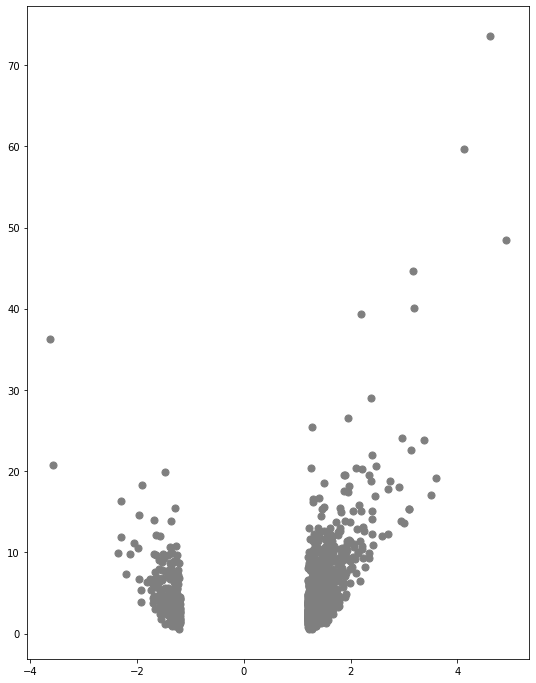

In [18]:
#figure( figsize=(3,4))
figure( figsize=(9,12))
scatter( coeff_list.coeff, coeff_list.logP, color=sns.color_palette("tab10")[7], s=50)
#xlabel('Coefficient')
#ylabel('-log(P)')
#savefig('./Figures/Fig_1_C.pdf')
#savefig('./Figures/Fig_1_C.png')
savefig('./Figures/Fig_1_C.tif')
show()

In [17]:
is_gof = [x for x in coeff_list.Feature.unique() if '_GOF' in x]
is_gof

['NRAS_GOF',
 'KRAS_GOF',
 'BRAF_GOF',
 'CTNNB1_GOF',
 'PIK3CA_GOF',
 'HRAS_GOF',
 'DNAH5_GOF',
 'STK11_GOF',
 'NFE2L2_GOF',
 'MUC16_GOF',
 'CYP4F2_GOF',
 'EGFR_GOF',
 'SMARCA4_GOF',
 'TTN_GOF',
 'FGFR3_GOF',
 'TP53_GOF',
 'RHOA_GOF',
 'FBXW7_GOF',
 'CDKN2A_GOF',
 'PTEN_GOF']

In [18]:
len(is_gof)

20

In [19]:
is_lof = [x for x in coeff_list.Feature.unique() if '_LOF' in x]
is_lof

['STAG2_LOF',
 'ARID1A_LOF',
 'RB1_LOF',
 'APC_LOF',
 'SLC22A16_LOF',
 'KANSL1L_LOF',
 'SMARCA4_LOF',
 'RBM10_LOF',
 'ITGB5_LOF',
 'ARID4B_LOF',
 'KLK6_LOF',
 'ZMYM5_LOF',
 'CC2D2A_LOF',
 'DBN1_LOF',
 'AGT_LOF',
 'CCDC78_LOF',
 'BPIFB4_LOF',
 'LRRC37B_LOF',
 'RICTOR_LOF',
 'TCEAL3_LOF',
 'DNAH7_LOF',
 'ARMCX1_LOF',
 'ALK_LOF',
 'CSPP1_LOF',
 'ERCC6L_LOF',
 'CLGN_LOF',
 'OBSL1_LOF',
 'ANKRD11_LOF',
 'CDK13_LOF',
 'NEK1_LOF',
 'KRT3_LOF',
 'ATRX_LOF',
 'STIM2_LOF',
 'MYO7B_LOF',
 'BRCA1_LOF',
 'OR8I2_LOF',
 'PCGF3_LOF',
 'KMT2A_LOF',
 'ACADVL_LOF',
 'DSP_LOF',
 'ZNF630_LOF',
 'C2CD5_LOF',
 'CHD2_LOF',
 'ZNF649_LOF',
 'ITM2A_LOF',
 'KRTAP10-6_LOF',
 'CPS1_LOF',
 'ELAVL2_LOF',
 'ENTPD2_LOF',
 'VWA8_LOF',
 'FAM168A_LOF',
 'NF2_LOF',
 'PLB1_LOF',
 'PTEN_LOF',
 'ANO4_LOF',
 'LIFR_LOF',
 'LAMA5_LOF',
 'PTPN23_LOF',
 'RNF4_LOF',
 'DKK3_LOF',
 'DNHD1_LOF',
 'CREBBP_LOF',
 'RABL2B_LOF',
 'ITGB2_LOF',
 'MAPT_LOF',
 'CASD1_LOF',
 'AIRE_LOF',
 'ZNF208_LOF',
 'ZNF597_LOF',
 'NLRP14_LOF',
 'NBR1_LOF',

In [20]:
len(is_lof)

327

In [21]:
is_other_len = len(coeff_list.Feature.unique()) - len(is_gof) - len(is_lof)
is_other_len

46

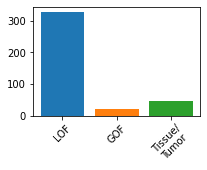

In [22]:
figure( figsize(3,2))
bar( [0], [len(is_lof)], facecolor=sns.color_palette("tab10")[0])
bar( [1], [len(is_gof)], facecolor=sns.color_palette("tab10")[1])
bar( [2], [is_other_len], facecolor=sns.color_palette("tab10")[2])
xticks( [0,1,2], ['LOF','GOF','Tissue/\nTumor'], rotation=45)
savefig('./Figures/Fig_1_D.pdf')
savefig('./Figures/Fig_1_D.png')
show()

In [23]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [25]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]